# FINM8006 Advanced Investment 
## Factor Models and APT
---
Qiaoqiao Zhu   
Australian National University

In [16]:
from __future__ import division
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import MonthEnd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rc('figure', figsize=(14, 8))


## CAPM through SDF

We've seen through how MVO and CAPM work. Now the immediate questions are
- What's the connection between SDF and CAPM?
- Is CAPM a unique characterization of SDF?

### CAPM and $\beta$ representation

Recall general $\beta$ representation from SDF
$$ E_{t}R^{e}_{i,t+1}=\beta_{i,m}\lambda_{m} $$

CAPM
$$ E_{t}R^{e}_{i,t+1}=\beta_{it}E_{t}(R^{e}_{M,t+1}) $$
therefore CAPM specifies
$$ \lambda_{m}=R^{e}_{M,t+1}; \qquad \beta_{i,m}=\beta_{it} $$

### Linear SDF to CAPM

Recall
$$0=E_{t}(m_{t+1}R^{e}_{i,t+1}) \Rightarrow E_{t}R^{e}_{i,t+1}=-\frac{cov(m_{t+1},R^{e}_{i,t+1})}{E_{t}(m_{t+1})}$$
Let’s specify $m_{t+1}=a_{t}+b_{t}R_{M,t+1}$ therefore $$\begin{aligned}
 E_{t}R^{e}_{i,t+1}&=-\frac{cov(a_{t}+b_{t}R_{M,t+1},R^{e}_{i,t+1})}{E_{t}(a_{t}+b_{t}R_{M,t+1})} \\
\text{(Stein's Lemma)} &= \frac{-b_{t}cov(R_{M,t+1},R^{e}_{i,t+1})}{a_{t}+b_{t}E_{t}(R_{M,t+1})} \\
&=  \frac{-b_{t}cov(R_{M,t+1},R_{i,t+1})}{a_{t}+b_{t}E_{t}(R_{M,t+1})} \end{aligned}$$

The above uses Stein’s Lemma:

Suppose $Y=g(X)$, $X$ and $Z$ are bivariate normal, $g(X)$ is
differentiable and $E|g'(X)|< \infty$, then
$$COV[Y,Z]=COV[g(X),Z]=E[g'(X)]COV(X, Z)$$

since $m$ is SDF for all assets, the above derivation also applies to market
portfolio $$\begin{aligned}
 E_{t}R^{e}_{M,t+1} &=  \frac{-b_{t}cov(R_{M,t+1},R_{M,t+1})}{a_{t}+b_{t}E_{t}(R_{M,t+1})} \\
               &= \frac{-b_{t}\sigma^{2}_{M}}{a_{t}+b_{t}E_{t}(R_{M,t+1})} \end{aligned}$$

Therefore we have
$$E_{t}R^{e}_{i,t+1}=  \frac{cov(R_{M,t+1},R_{i,t+1})}{\sigma^{2}_{M}}E_{t}R^{e}_{M,t+1}$$
That’s exactly CAPM!

From the derivation above, we see that CAPM needs some assumptions, it generally needs join normal return distribution, but can be relaxed using (log) linearization. 

### Comments

-   CAPM is a special factor model, using $R_{M}$ as the sole factor.
-   CAPM is not innocuous as you notice we need a host of assumptions to
    derive it. It’s more likely to hold period by period.
-   It’s central insight is in equilibrium covariance properties
    (last lecture). Investors care about portfolio return, not
    individual asset return.
-   It’s “success” is built on the failure of consumption data in
    pricing assets. That is, it has been worked “ok” empirically.

## Multi-factor Models

We can generalize the argument before and specify SDF as
$m_{t+1}= \beta \frac{u'(c_{t+1})}{u'(c_{t})}=a+\sum_{k=1}^{k=K} b_{k}f_{k} $
or in vector form $$m_{t+1}=a+b'F_{t+1}$$ where $F_{t+1}$ is a vector of
factors that “proxy for marginal utility.”

the beta-pricing model $$E_{t}R_{i,t+1}=\gamma+\beta'_{i}\lambda$$ where
$\beta_{i}$ is regression coefficient vector of $R_{i}$ on the factors,
or the factor “loading”, $\lambda$ is vector of risk prices for each
factor in $F_{t+1}$.

### APT 

In stead of starting from economic modeling, we can start with realized outcome and derive implication for expected return through statistical property of the portfolio residual, based on law of one price and no arbitrage. That's called Arbitrage Pricing Theory (APT).

#### APT in a single-factor model
Single-factor model expressed in realized returns
$$R_{it}-R_{f}=\alpha_{i}+\beta_{im}(R_{Mt}-R_{f})+\varepsilon_{it}$$
suppose errors are uncorrelated across stocks $$\begin{aligned}
E[\varepsilon_{it} \varepsilon_{jt}] &=0 \\
 cov(R_{it}, R_{jt})&=\beta_{im}\beta_{jm} \sigma^{2}_{M}
   \end{aligned}$$ The residual risk in any stock is idiosyncratic. If
many assets are available, we should expect $\alpha_{i}\rightarrow 0 $, why?

The portfolio return of N assets:
$$R_{pt}-R_{f}=\alpha_{p}+\beta_{pm}(R_{Mt}-R_{f})+\varepsilon_{pt}$$
where $\alpha_{p}=\sum_{i=1}^{N}w_{i}\alpha_{i}$,
$\beta_{pm}=\sum_{i=1}^{N}w_{i}\beta_{im}$ and
$\varepsilon_{pt}=\sum_{i=1}^{N}w_{i}\varepsilon_{it}$ The variance of
$\varepsilon_{pt} $ is
$$var(\varepsilon_{pt})=\sum_{i=1}^{N}w^{2}_{i}var(\varepsilon_{it})$$
it will shrink rapidly with N provided that no single weight $w_{j}$ is
too large.



A well diversified portfolio 
$var(\varepsilon_{pt}) \rightarrow 0 $. We can then neglect
$\varepsilon_{pt}$ and write:
$$R_{pt}-R_{f}=\alpha_{p}+\beta_{pm}(R_{Mt}-R_{f})$$ Then we should have
$\alpha_{p}=0$. Otherwise you can arbitrage with $\beta_{pm}$ units of
market and one unit of the portfolio to get riskless excess return of
$\alpha_{p}$.

APT (Ross (1976)) build on this to show that $\alpha_{p}=0$ for all well
diversified portfolio implies
$$\lim_{N\rightarrow \infty} \frac{1}{N}\sum_{i=1}^{N}\alpha^{2}_{i}=0$$
Each $\alpha^{2}_{i}$ is nonnegative, the limiting average is zero,
therefore almost all individual assets have $\alpha_{i}$ very close to
zero. We have Beta pricing without the CAPM assumptions.

#### k-Factor Structure

Suppose we have return generating process
$$R_{it}-R_{f}=a_{i}+\sum_{k=1}^{K}\beta_{ik}\tilde{f}_{k}+\varepsilon_{it}$$
where $\beta_{ik}$ is factor loading, $\tilde{f}_{k}$ is zero-mean
shocks to orthogonal factors $f_{k}$. 

If residual risk $\varepsilon_{it}$ is idiosyncratic, then
$$\begin{aligned}
E(\varepsilon_{it})&=0 \\E[\varepsilon_{it} \varepsilon_{jt}] &=0 \\ E(\varepsilon_{it}\tilde{F})&=0 \\ E(\tilde{F})&=0 \end{aligned}$$

#### Multi-Factor APT

APT states that if $N\gg K$,
$$a_{i}=\sum_{k=1}^{K}\beta_{ik}\lambda_{k}$$ where $\lambda_{k}$ is the
price of risk of the $k$’th factor. or in vector expectation form
$$E(R_{i})-R_{f}=\beta'_{i}\lambda$$ that’s the same expression as in
multi-factor return model!

We will skip the formal proof, but the basic intuition is that a portfolio based on $$\omega_{i}=\frac{\alpha_{i}}{\|\alpha\|\sqrt{N}}$$ where $\alpha$ is 
$$\alpha_{i} \equiv (R_{it}-R_{f})-\sum_{k=1}^{K}\beta_{ik}\lambda_{k}=\beta'_{i}\tilde{F}+\varepsilon_{it}$$
is self-financing and riskless, and therefore an arbitrage portfolio since,
$$\begin{aligned}
E(\alpha_{i}) &= 0  \\
E(\alpha_{i}\beta_{ik})&=0  \end{aligned}$$. Non-artitrage condition requires that $\alpha_{i}\rightarrow 0$.

$$R_{it} -R_{f} = \sum \beta_{it} \lambda_{it} + \beta_{it} \tilde f_{it} +e_{ie}  $$
$$ E(R_{it} - R_{f}) - \sum \beta_{it} \lambda_{it} = \alpha_{it}  =0  $$

###### A trivial Example

A Two company one period economy that depend on one factor (boom/bust)


|     | IBM | DELL |
|:---:|-----|------|
|Boom Payoff (Pr=0.5)| 140 | 160 |
|Bust Payoff (Pr=0.5) | 100 | 80 |
|E(CF1) |120 |120 |
|Time 0 Price| 100 | ? |
|Discount Rate | 20% |? |

expected returns

In general you can fit a regression $R_{i,t}=E(R_{i})+\beta_{i, bc}f_{bc,t}+\epsilon_{i,t}$ Here, we have only two points, so we can fit a line exactly. For IBM
$$ \left\{\begin{aligned}0.4&=E(R_{IBM})+\beta_{IBM, bc}0.5 \quad \text{(boom)}\\ 0.0&=E(R_{IBM})+\beta_{IBM, bc}(-0.5) \quad \text{(bust)} \end{aligned} \right. $$
solve for $E(R_{IBM})=0.2$ (we already know) and $\beta_{IBM, bc}=0.4$. Assume $P_{DELL}=90$. Similar calculations for DELL gives $E(R_{Dell})=0.3333$ and $\beta_{Dell, bc}=0.8889$. 

Factor Price
$$ \left\{\begin{aligned}E(R_{IBM}) &=\lambda_{0}+\beta_{IBM, bc}\lambda_{bc}\\ E(R_{Dell})&=\lambda_{0}+\beta_{Dell, bc}\lambda_{bc} \end{aligned} \right. $$
and solve for $\lambda_{0}=0.0909$ and $\lambda_{bc}= 0.2727$. 

Obviously, $\lambda_{0}=0.0909$ need to be the risk-free rate. What if it's not? If there is a risk-free asset of 5%, we can combine DELL and IBM (base assets) to create a synthetic risk-free asset with a
return of 9.09%. Therefore we can borrow money at 5% and invest in equally risk free 9.09%.

$$w_{IBM}\beta_{IBM, bc}+(1-w_{IBM})\beta_{Dell, bc}=\beta_{p, bc}=0  $$. Therefore $w_{IBM}=1.8182$ and $w_{Dell}=1-w_{IBM}=-0.8182$. 

similarly, if we have some assets that implies a difference $\lambda_{bc}$, then that price has to adjust to avoid arbitrage. APT relies on the fact that all assets are prices by the same factor price $\lambda_{bc}$. 

## Finding Factors

Multifactor and APT models are only as good as the factors you choose. But the models do not tell us what the factors are. Some approaches to the factor models:
- Macroeconomic approach
- Firm-Fundametal approach
- Statistical approach

Every investment firm has their own factor models.

### Macro Factors
- Macroeconomic variables that affect "state of the economy" that market cares about
- variables need to be stationary
- Surprice in factors
- Classicle example: Chen, Roll and Ross (1986)
 - Industrial output, inflation, default spread, term spread

Once $k$ factors has been specified, we can 
 - construct factor suprises $\tilde f= f-E(f) $
 - estimate $\beta_{ik}$ from time series regression for each asset $i$ rom
$$R_{it}-R_{f}=a_{i}+\sum_{k=1}^{K}\beta_{ik}\tilde{f}_{k}+\varepsilon_{it}$$
 - estimate sample average excess return (i.e., expected) of each asset, $\hat \mu_{i}$. 
 - run cross sectional regression of $$ \hat \mu_{i} = \lambda_{0} +\sum_{k=1}^{K}\lambda_{k}\hat \beta_{ik}+ u_{i}$$

- the $\lambda_{k}$ you estimate is the reward for bearing factor-k risk, i.e., factor risk premium. 
- In order to test the model, we can use the same Fama-Macbeth approach as before.

Let's see a simplified Chen, Roll and Ross (1986) example. All in surprises:
 - MP: Industrial output
 - UI: expected inflation
 - DEI: unexpected inflation
 - UTS: default spread
 - UPR: term spread

In [3]:
def setmdate(x, ym='yyyymm'):
    df = x.set_index(ym)
    df.index = df.index.astype('str')
    df.index = pd.to_datetime(df.index, format="%Y%m")
    df.index = df.index.to_period('M').to_timestamp('M')
    df.index.name = 'Date'
    return df

In [4]:
# monthly data from 1963 to 2011 (nov) of macro factors
crr = pd.read_csv('../datalib/crr_2011.csv')
crr = setmdate(crr, ym = 'yyyymm')
crr.index = crr.index + MonthEnd(0)
crr.head(3)

,MP,UI,DEI,UTS,UPR
Date,,,,,
1963-01-31,0.007285,0.001114,-0.000008,0.009024,0.0070
1963-02-28,0.011347,0.000461,0.000099,0.009217,0.0070
1963-03-31,0.006138,0.000032,0.000400,0.009270,0.0069


And grab some portfolio returns from Fama-French website as testing portfolio. Here, we arbitrary use the 25-size-BM portfolio

In [5]:
start = datetime.datetime(1963, 1, 1)
end = datetime.datetime(2011, 12, 30)
ds = web.DataReader("25_Portfolios_5x5", "famafrench", start, end)
tb = pd.DataFrame(ds[0])
tb = tb.replace(-99.99, np.nan).dropna()
tb.index = tb.index.to_timestamp('M')
tb.index = tb.index + MonthEnd(0)
tb = tb/100  # from percentages
tb.head(3)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,,,,,
1963-01-31,0.1302,0.1144,0.0969,0.1086,0.1113,0.0763,0.0581,0.0761,0.0870,0.1111,0.0637,0.0565,0.0488,0.0863,0.0933,0.0530,0.0500,0.0589,0.0971,0.0631,0.0527,0.0409,0.0346,0.0651,0.0640
1963-02-28,-0.0325,-0.0349,-0.0087,-0.0081,0.0278,-0.0402,-0.0189,-0.0240,-0.0170,-0.0009,-0.0376,-0.0126,-0.0064,-0.0245,0.0089,-0.0324,-0.0144,-0.0085,-0.0092,-0.0059,-0.0328,-0.0161,-0.0205,-0.0141,-0.0094
1963-03-31,0.0498,-0.0147,-0.0059,0.0145,0.0258,-0.0016,0.0118,0.0124,0.0293,0.0131,-0.0005,0.0155,0.0112,0.0363,0.0173,0.0220,0.0167,0.0280,0.0348,0.0372,0.0373,0.0283,0.0457,0.0482,0.0563


In [6]:
start = datetime.datetime(1963, 1, 1)
end = datetime.datetime(2011, 12, 30)
ds = web.DataReader("F-F_Research_Data_Factors", "famafrench", start, end)
ff = pd.DataFrame(ds[0])
ff.index = ff.index.to_timestamp('M')
ff['mktret']=ff['Mkt-RF']+ff['RF']
ff = ff.rename(columns={'Mkt-RF': 'mktrf'})
ff = ff/100
ff.index = ff.index + MonthEnd(0)
ff.head(3)

,mktrf,SMB,HML,RF,mktret
Date,,,,,
1963-01-31,0.0493,0.0310,0.0219,0.0025,0.0518
1963-02-28,-0.0238,0.0048,0.0225,0.0023,-0.0215
1963-03-31,0.0308,-0.0251,0.0193,0.0023,0.0331


stack the returns and run time sereis regression by portfolio

In [7]:
varlist = crr.columns.tolist()
df = pd.DataFrame(tb.stack())
df.index = df.index.set_names('port', level=1)
df.columns=['ret']
df = df.reset_index().set_index('Date')
df = df.join(crr).dropna()
df = df.join(ff[['mktrf', 'RF']]).dropna()
df['rirf'] = df['ret'] - df['RF']
df.head(3)

,port,ret,MP,UI,DEI,UTS,UPR,mktrf,RF,rirf
Date,,,,,,,,,,
1963-01-31,SMALL LoBM,0.1302,0.007285,0.001114,-0.000008,0.009024,0.007,0.0493,0.0025,0.1277
1963-01-31,ME1 BM2,0.1144,0.007285,0.001114,-0.000008,0.009024,0.007,0.0493,0.0025,0.1119
1963-01-31,ME1 BM3,0.0969,0.007285,0.001114,-0.000008,0.009024,0.007,0.0493,0.0025,0.0944


In [8]:
print(smf.ols('rirf ~ MP + UI + DEI + UTS + UPR', df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   rirf   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     49.44
Date:                Wed, 30 Aug 2017   Prob (F-statistic):           6.04e-51
Time:                        22:59:04   Log-Likelihood:                 21166.
No. Observations:               14675   AIC:                        -4.232e+04
Df Residuals:                   14669   BIC:                        -4.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0015      0.001     -1.203      0.2

In [9]:
print(smf.ols('rirf ~ mktrf + MP + UI + DEI + UTS + UPR', df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   rirf   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     6253.
Date:                Wed, 30 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                 30355.
No. Observations:               14675   AIC:                        -6.070e+04
Df Residuals:                   14668   BIC:                        -6.064e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.742      0.4

In [10]:
def ols_res(df, xcols,  ycol):
    X = sm.add_constant(df[xcols])
    return sm.OLS(df[ycol], X).fit().params

def coeffest(dfg, xlist, startd='1968-01' , endd='2010-12'):
    betas = pd.DataFrame()
    loopm = pd.date_range(start=startd, end=endd, freq='MS')
    for m in loopm:
        mrange = pd.date_range(end=m, periods=36, freq='M')
        drange = dfg.loc[dfg.index.isin(mrange)]
        ld = drange.groupby(['port']).apply(ols_res, xlist, ['rirf'])
        ld['Date'] = m + MonthEnd(0)
        betas = betas.append(ld)
    for name in xlist:
        betas = betas.rename(columns={name: name+'beta'})
    return betas

In [11]:
# Estimate beta from past x month of data
betas = coeffest(df, ['MP', 'UI', 'DEI', 'UTS', 'UPR'], startd='1968-01' , endd='2011-11')

df2 = df.reset_index().set_index(['Date', 'port'])
betas2 = betas.reset_index().set_index(['Date', 'port'])
df2 = df2[['rirf']].join(betas2).dropna().reset_index()
df2.head(3)

,Date,port,rirf,const,MPbeta,UIbeta,DEIbeta,UTSbeta,UPRbeta
0,1968-01-31,SMALL LoBM,0.0274,-0.019875,-1.534972,-37.512400,133.482373,6.226264,11.920092
1,1968-01-31,ME1 BM2,0.0217,-0.001107,-0.818476,-31.584840,108.114928,5.512415,7.011172
2,1968-01-31,ME1 BM3,0.0250,-0.005549,-1.257649,-31.166854,99.396328,4.993825,7.393651


In [13]:
print('Fama-Macbeth style cross-section premium estmations')
%run fama_macbeth.py
fm  = fama_macbeth('rirf ~ MPbeta + UIbeta + DEIbeta + UTSbeta + UPRbeta', 'Date', df2, lags=0)
fm

Fama-Macbeth style cross-section premium estmations


,coef,stderr,tvalue,pvalue,stars
Intercept,0.006243,0.002318,2.693055,0.007080,***
MPbeta,-0.000972,0.000776,-1.251218,0.210855,
UIbeta,0.000331,0.000188,1.759433,0.078504,*
DEIbeta,-0.000020,0.000090,-0.219613,0.826172,
UTSbeta,0.001225,0.000920,1.332340,0.182748,
UPRbeta,-0.000241,0.000235,-1.028585,0.303675,


In general, unexpected inflation, interest rate term spread and default premium is find to have postive premiums. Explanatory powers are relatively small in general. Alpha still not eliminated. 

### Firm Fundamental Approach
 - Identify firm characteristics that proxy for sensitivity to systematic risk
   - membership in specific industry
   - BTM, liquidity, leverage, profitability etc.

#### BARRA Style
 - take $\beta_{ik}$, a dummy variable whether firm $i$ is in industry $k$ as known, 
 - More generally take observable asset specific fundamentals as the factor betas, $\beta_{ik}$, which are time invariant.
 - cross-sectionally estimate $f_{kt}$ for each $t$.
 - popular in industry

#### Fama-French Style
 - Sorted the cross-section of assets based on the values of the asset specific characteristic.
 - Form hedge portfolio along side dimensions that CAPM fails, and calculate factor prices, then estimate $\beta_{ik}$.
 - more later.

## Statistical Approach: Variance Decomposition and Principal Component

Factor models do not tell us what should be the factors. One approach is to see on which dimensions variance-covariance matrix of returns vary the most. 

Eigenvalues and eigenvectors

Mathmatically, Eigenvalue $\lambda$ and eigenvector $v$ of a square $n\times n$ matrix $A$ is such that
$$ Av=\lambda v $$


Variance Decomposition

A variance covariance matrix $A$ can be decomposed as $$ A=Q\Lambda Q^{-1} $$ where $Q$ is a $n\times n$ matrix with eigenvector $v_{k}$ of $A$ in kth column, and $\Lambda$ is a diagonal matrix with corresponding eigenvalues at diagonal, $\Lambda_{kk}=\lambda_{k}$. 

$\lambda_{k}$ measures how much variation is explained by the kth eigenvector (factor).

### Example: Manual PCA

Let's do a "manual" PCA using a simple two-stock example.

In [14]:
mreturns = pd.read_csv('../datalib/aapl5.csv')
mreturns['mktret'] = mreturns.mktrf + mreturns.rf
mreturns = mreturns.set_index('Date')
mreturns.head(3)

,AAPL,IBM,MSFT,SP500,mktrf,rf,mktret
Date,,,,,,,
2005-02-28,0.166710,-0.007101,-0.039664,0.018903,0.0189,0.0016,0.0205
2005-03-31,-0.071110,-0.012962,-0.039348,-0.019118,-0.0197,0.0021,-0.0176
2005-04-30,-0.134629,-0.164150,0.046752,-0.020109,-0.0261,0.0021,-0.0240


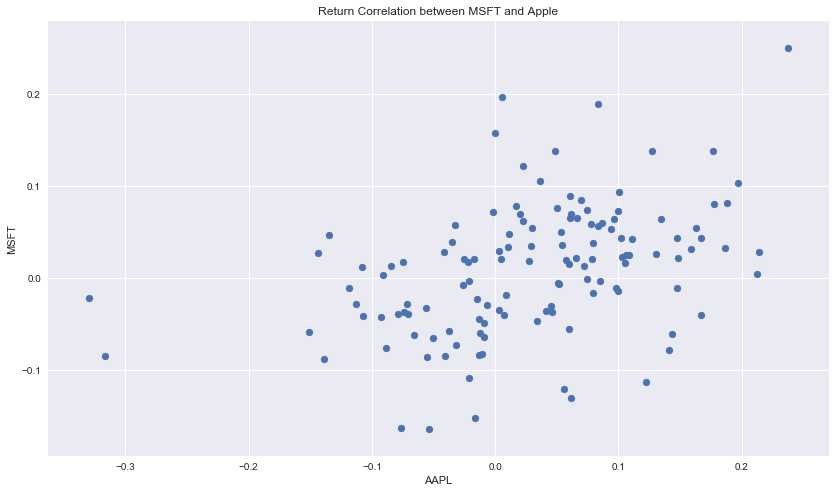

In [17]:
fig, ax = plt.subplots()
plt.scatter(x=mreturns['AAPL'], y=mreturns['MSFT'])
#ols_fit = sm.OLS(returns['GOOGL'].values, returns['AAPL'].values).fit()
#plt.plot(returns['AAPL'], ols_fit.fittedvalues, 'r')  #make sure to srop NA for this to show
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.title('Return Correlation between MSFT and Apple')
plt.show()

In [18]:
## First, De-mean the return matrix of AAPL and MSFT.
# demean returns
df = mreturns.loc[:, ['AAPL','MSFT']]
for col in df.columns:
    df[col] -= df[col].mean()
df.head()

,AAPL,MSFT
Date,,
2005-02-28,0.137280,-0.049344
2005-03-31,-0.100540,-0.049028
2005-04-30,-0.164059,0.037072
2005-05-31,0.073177,0.013317
2005-06-30,-0.103625,-0.046889


In [19]:
## Then calculate the covariance matrix
cov_mat = df.corr()
print('Covariance matrix \n%s'%cov_mat)

Covariance matrix 
          AAPL      MSFT
AAPL  1.000000  0.415895
MSFT  0.415895  1.000000


In [20]:
## From covariance matrix, we can do Eigenvecor decomposition.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n', eig_vecs)
print('\nEigenvalues\n', eig_vals)

Eigenvectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues
 [ 1.41589503  0.58410497]


Notice that that first Eigenvalue is much bigger than the second. Sometimes, data is processed to be of mean zero and unit variance, then the first Eigenvalue is always greater than one. Eigenvector associated with the highest Eigenvalue is sometimes called PCA1, and so on.

Let's plot the first Eigenvector together with data. We can clearly see that it captures the biggest variation in the two returns.  

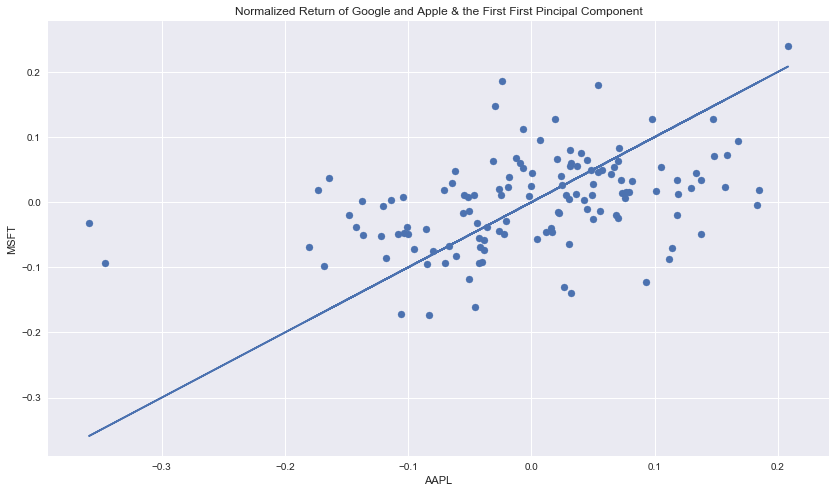

In [21]:
# slope of eigenvector for plotting
b = eig_vecs[:,0][1]/eig_vecs[:,0][0]
fig, ax = plt.subplots()
plt.scatter(x=df['AAPL'], y=df['MSFT'])
#ols_fit = sm.OLS(returns['GOOGL'].values, returns['AAPL'].values).fit()
#plt.plot(returns['AAPL'], ols_fit.fittedvalues, 'r')  #make sure to srop NA for this to show
plt.plot(df['AAPL'], b*df['AAPL'])
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.title('Normalized Return of Google and Apple & the First First Pincipal Component')
plt.show()

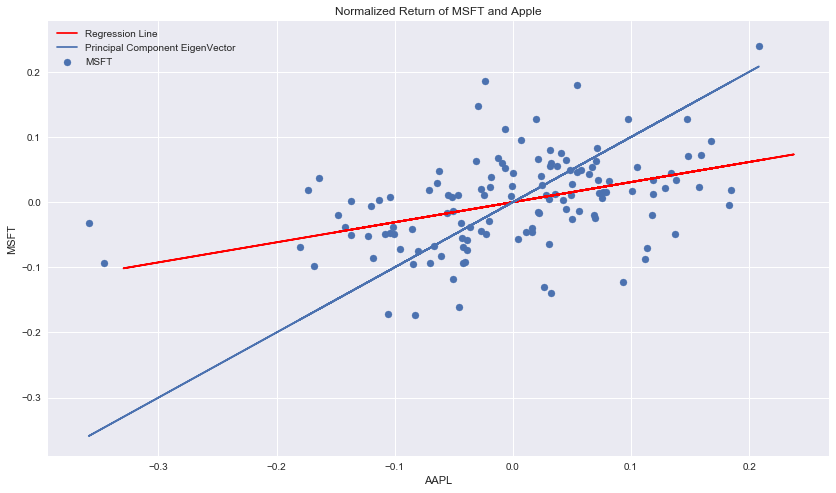

In [22]:
b = eig_vecs[:,0][1]/eig_vecs[:,0][0]
fig, ax = plt.subplots()
plt.scatter(x=df['AAPL'], y=df['MSFT'])
ols_fit = sm.OLS(mreturns['MSFT'].values, mreturns['AAPL'].values).fit()
plt.plot(mreturns['AAPL'], ols_fit.fittedvalues, 'r', label='Regression Line')  #make sure to srop NA for this to show
plt.plot(df['AAPL'], b*df['AAPL'], label='Principal Component EigenVector')
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.legend()
plt.title('Normalized Return of MSFT and Apple')
plt.show()

Proportion of variance explained by the two PCA

In [23]:
print("""
PCA 1: {0:.2f}% of the variance
PCA 2:  {1:.2f}% of the variance
""".format(*tuple(eig_vals / eig_vals.sum() * 100)))


PCA 1: 70.79% of the variance
PCA 2:  29.21% of the variance



We can "get back" the data by projecting PCA onto the initial return space. The projection using the PCA1 is the common comovement of the two stocks on the first direction. 

In [24]:
# Project data to our 1D space
df_1D = pd.DataFrame(df[['AAPL', 'MSFT']].dot(eig_vecs[:,0]),
                    columns=['projection'])

df_1D.head(3)

,projection
Date,
2005-02-28,0.062180
2005-03-31,-0.105761
2005-04-30,-0.089794


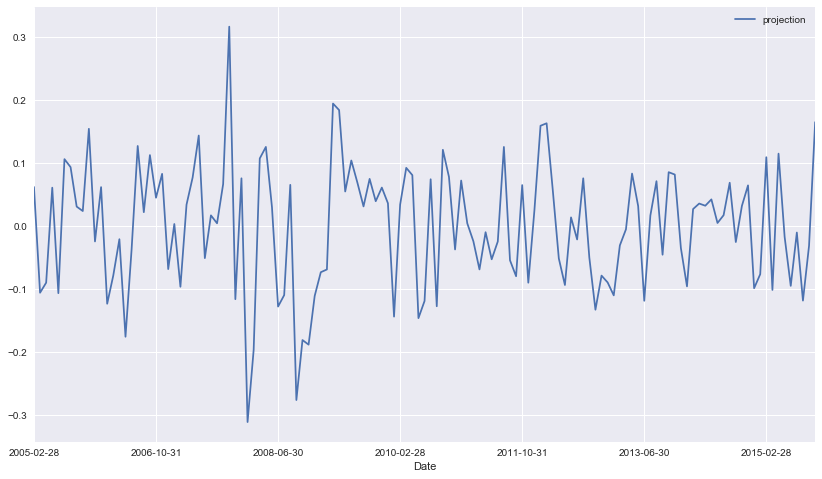

In [25]:
df_1D.plot()

And the transformed return of AAPL and GOOGL based on just PCA1

In [26]:
df_1D['AAPL'] = df_1D['projection']*eig_vecs[:,0][0]
df_1D['MSFT'] = df_1D['projection']*eig_vecs[:,0][1]
df_1D.head()

,projection,AAPL,MSFT
Date,,,
2005-02-28,0.062180,0.043968,0.043968
2005-03-31,-0.105761,-0.074784,-0.074784
2005-04-30,-0.089794,-0.063494,-0.063494
2005-05-31,0.061160,0.043247,0.043247
2005-06-30,-0.106430,-0.075257,-0.075257


If we redo the initial plot of MSFT against AAPL using transformed return, we see that all data lines up along the first Pricipal Component. Clearly, some information is lost if we just use PCA1. 

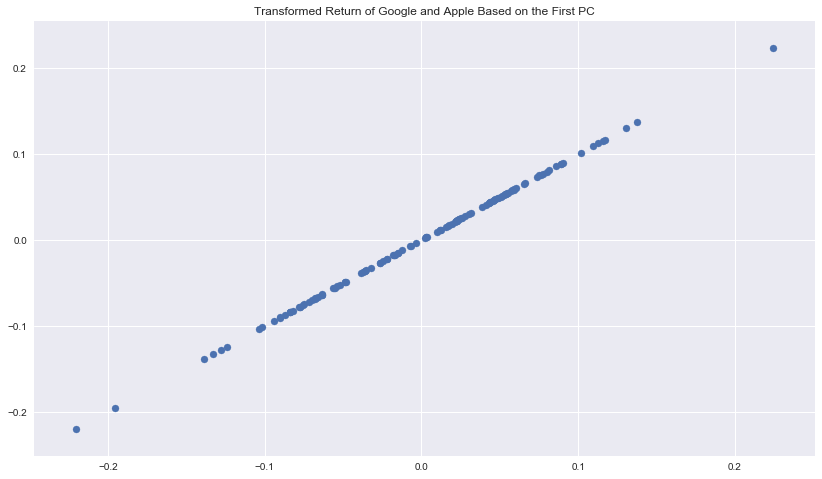

In [27]:
fig, ax = plt.subplots()
plt.scatter(x=df_1D['AAPL'], y=df_1D['MSFT'])
plt.title('Transformed Return of Google and Apple Based on the First PC')
plt.show()

### Example: PCA of industry portfolios

It doesn't make much sense to find factor for two stocks. Let's use a 30-industry portfolio. 

In [28]:
# Note that -99.99 is missing value
start = datetime.datetime(1963, 1, 1)
end = datetime.datetime(2015, 12, 30)
ds = web.DataReader("30_Industry_Portfolios", "famafrench", start, end)
tb = pd.DataFrame(ds[0])
tb = tb.replace(-99.99, np.nan)
tb = tb.dropna()
tb.index = tb.index.to_timestamp('M')
tb.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1963-01-31,6.64,4.03,1.72,8.69,6.55,5.46,6.45,5.65,4.46,8.82,4.56,7.93,7.64,4.97,6.21,1.20,10.66,8.25,2.58,5.26,4.13,1.36,6.14,8.23,5.99,3.57,4.09,7.53,3.63,8.64
1963-02-28,-2.73,-5.05,-3.36,-6.65,-1.94,-3.25,-3.18,-2.58,-3.85,0.65,-0.71,-2.13,-2.60,-6.36,-2.93,-0.96,-1.76,-0.44,-1.33,-1.47,-1.09,0.06,-4.11,-2.17,0.29,-1.87,-0.52,-3.74,-0.35,0.30
1963-03-31,1.73,4.61,7.74,1.12,-0.87,4.00,1.42,1.18,3.65,0.83,3.44,2.24,2.90,1.39,6.82,0.23,2.73,6.20,6.99,1.79,1.94,3.90,3.70,3.01,3.31,0.60,2.17,-5.72,2.30,5.29
1963-04-30,1.10,0.66,6.30,-0.80,7.95,6.02,1.60,7.62,4.44,7.69,4.01,5.45,3.38,5.88,5.98,3.37,4.89,4.34,6.08,2.40,3.73,2.43,6.78,4.86,8.52,5.64,5.51,0.48,3.65,6.11
1963-05-31,3.49,1.20,-3.00,4.43,0.55,0.91,0.49,-0.25,1.28,2.44,1.18,6.56,6.08,4.68,7.15,-0.90,2.29,3.90,-0.19,1.03,-0.64,3.53,3.85,-1.13,6.56,1.09,2.68,3.12,0.42,-0.03


Find the first 3 Principal Component. 

In [29]:
# pre-transform data to be mean zero and unit variance
# here we use a sklearn shortcut
X_std = StandardScaler().fit_transform(tb)
pca = PCA(n_components=3)
Y = pca.fit_transform(X_std)
print('Variance percent explained\n', pca.explained_variance_ratio_)

Variance percent explained
 [ 0.62895045  0.0569373   0.0462166 ]


In [30]:
-pca.components_

array([[  1.77772853e-01,   1.58815723e-01,   1.19812997e-01,
          1.98380725e-01,   2.00439739e-01,   1.85209007e-01,
          1.91115882e-01,   1.71509805e-01,   2.01484352e-01,
          1.81069627e-01,   2.10619952e-01,   1.82587324e-01,
          2.06015823e-01,   2.01860097e-01,   1.80708201e-01,
          1.92703068e-01,   1.36587551e-01,   1.20178884e-01,
          1.43919717e-01,   1.36107551e-01,   1.60017026e-01,
          1.94211301e-01,   1.76860628e-01,   2.03453183e-01,
          1.99605205e-01,   2.04970779e-01,   1.92983340e-01,
          1.90742721e-01,   2.02660618e-01,   2.00245824e-01],
       [ -3.17952446e-01,  -3.17015768e-01,  -2.47442627e-01,
          1.07808743e-02,  -4.16167570e-02,  -2.41532330e-01,
         -6.13170308e-02,  -2.50376513e-01,   1.22202963e-01,
          2.45005826e-02,   5.26385010e-02,   3.21925070e-01,
          2.27919453e-01,   5.58495537e-02,   1.12508573e-01,
          2.25344736e-02,   3.81720737e-01,   3.36683602e-01,
       

In [31]:
# We can check that we indeed get the correct eigenvectors
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n', eig_vecs[:,:3])

Eigenvectors 
 [[  1.77772853e-01  -3.18009912e-01  -2.02669551e-01]
 [  1.58815723e-01  -3.16990941e-01  -1.50597671e-01]
 [  1.19812997e-01  -2.47428578e-01  -3.64987429e-01]
 [  1.98380725e-01   1.08050108e-02   1.73294567e-01]
 [  2.00439739e-01  -4.16040368e-02   1.10487649e-01]
 [  1.85209007e-01  -2.41471465e-01  -1.14210225e-02]
 [  1.91115882e-01  -6.13340101e-02   1.70046231e-01]
 [  1.71509805e-01  -2.50404937e-01  -1.35218697e-01]
 [  2.01484352e-01   1.22153263e-01  -5.07535480e-02]
 [  1.81069627e-01   2.45527412e-02   1.92588582e-01]
 [  2.10619952e-01   5.26615665e-02   1.18305007e-02]
 [  1.82587324e-01   3.21868086e-01   1.29413496e-02]
 [  2.06015823e-01   2.27902498e-01   2.70637671e-02]
 [  2.01860097e-01   5.58467502e-02   8.33466631e-02]
 [  1.80708201e-01   1.12502754e-01   1.84369464e-01]
 [  1.92703068e-01   2.24966244e-02   1.74362909e-02]
 [  1.36587551e-01   3.81748203e-01  -1.92027013e-01]
 [  1.20178884e-01   3.36703061e-01  -3.36390935e-01]
 [  1.4391971

And project back to the data space

In [32]:
df_pca = pd.DataFrame(Y*(-1),
                     columns=['PCA1', 'PCA2','PCA3'])
df_pca.index = tb.index
df_pca.head()

,PCA1,PCA2,PCA3
Date,,,
1963-01-31,4.295524,0.128478,-0.291562
1963-02-28,-2.985328,0.666930,0.423871
1963-03-31,1.408518,0.346879,-1.053895
1963-04-30,3.278037,0.185319,-0.280010
1963-05-31,0.930098,0.785685,0.765601


You may wonder what's the interpretation of the PCA1. Let's introduce some factor returns, and plot PCA1 against market return. 

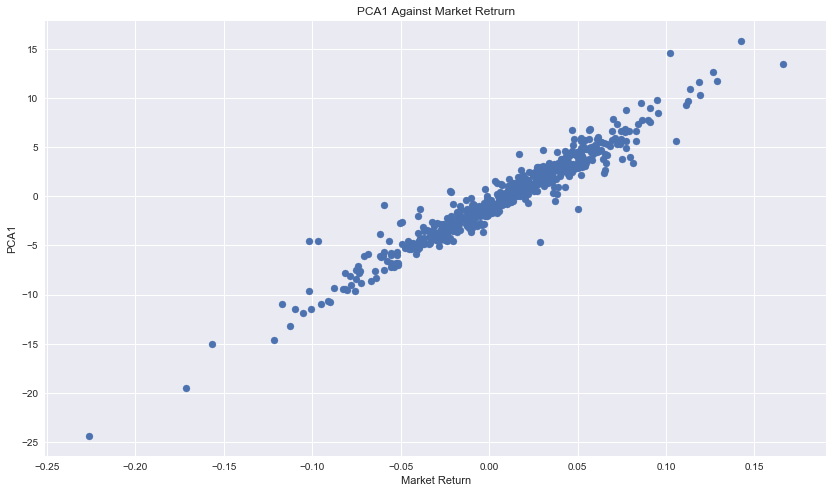

In [33]:
df2 = df_pca.join(ff['mktret'])
fig, ax = plt.subplots()
plt.scatter(df2.mktret, df2.PCA1)
plt.title('PCA1 Against Market Retrurn')
plt.xlabel('Market Return')
plt.ylabel('PCA1')
plt.show()

You guessed it right. The first PC is highly positively correlated with $R_M$.

Factor Mimicking Portfolios

Recall that each sample principal component (factor) is a linear combination of returns weighted by eigenvector. If we normalized the wights in eigenvector we can get the portfolio weights to replicate factor returns. 

For example, mimicking portfolio weights of PCA1 in our example are: 

In [38]:
evec = pca.components_
mmp = []
for i in range(len(evec[0])):
    w = evec[0][i]/evec[0].sum()
    mmp.append(w)
w = pd.DataFrame(mmp, index=tb.columns)
w.columns=['Mimicking Portfolio Weight']
w = w.sort_values('Mimicking Portfolio Weight', ascending=False)
w

,Mimicking Portfolio Weight
Cnstr,0.038841
FabPr,0.037992
Whlsl,0.037799
Paper,0.037519
Fin,0.037373
ElcEq,0.037225
Chems,0.037156
Books,0.036963
Other,0.036928
Trans,0.036810


#### Constructing factor mimicking portfolios
More generally, we construct factor mimicking portfolio by "projecting" factor $\tilde f$ on to a relatively small number of diversified portfolios 
$$\tilde{f}_{t}=b_{0}+\sum_{i=1}^{N}b_{i}R^{e}_{it}+\varepsilon_{it}$$
the estimated coefficient $b_{1}, b_{2},\cdots, b_{N}$ are the weights of the factor mimicking portfolio on N assets.

factor mimicking portfolios are useful for
 - hedging factor risks
 - factor tiling
 - estimating factor risk premium

## Concluding Remarks

-   CAPM impose structure and many assumptions to get specific model
    predictions; in contracts, APT and multifactor models impose few
    assumptions therefore get less specific model predictions. What best
    describes asset prices then is an empirical question.
    
-   The selection and number of factors should consider both fit of the model and parsimonosity. There are models that's developed that can guide us in selection of factors. 


-   The most important takeaway from these theories should be that it’s
    not only future cash flows that’s important for asset pricing, how
    these cash flows correlate with the state of the economy is
    also important. Payoffs in state of distress is more valued
    therefore should have higher asset prices.